<a href="https://colab.research.google.com/github/soyeonpark11/2020_cphys2/blob/master/hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


학습셋 : 60000 테스트셋:  10000


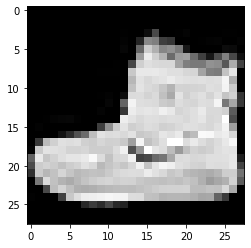

9
(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
print("학습셋 :",len(train_X),"테스트셋: ", len(test_X))
plt.imshow(train_X[0], CMAP='gray')
plt.show()
print(train_Y[0])
train_X = train_X/255.0
test_X = test_X/255.0
print(train_X.shape, test_X.shape)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)



In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=16, activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32,activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
                                                                                 
])



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Train on 45000 samples, validate on 15000 samples
Epoch 1/3
45000/45000 [==============================] - 26s 574us/sample - loss: 0.5835 - acc: 0.7854 - val_loss: 0.3864 - val_acc: 0.8563
Epoch 2/3
45000/45000 [==============================] - 24s 540us/sample - loss: 0.3838 - acc: 0.8603 - val_loss: 0.3352 - val_acc: 0.8779
Epoch 3/3
45000/45000 [==============================] - 23s 516us/sample - loss: 0.3341 - acc: 0.8799 - val_loss: 0.3001 - val_acc: 0.8861


[0.3149373885154724, 0.8832]

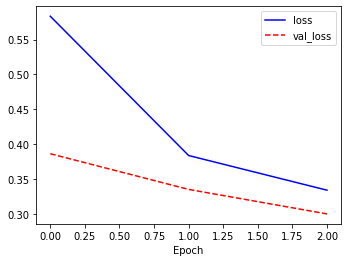

In [5]:
history = model.fit(train_X, train_Y, epochs=3, validation_split=0.25)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
model.evaluate(test_X, test_Y, verbose=0)


In [41]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


X_train = X_train.reshape((60000, 28*28))
X_train = X_train/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test/255

net = models.Sequential()
net.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(512, activation='relu')) 
net.add(layers.Dropout(0.5))
net.add(layers.Dense(10, activation='softmax')) 
net.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])
X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val= net.fit(partial_X_train,partial_y_train,epochs=10, batch_size=64, validation_data=(X_val, y_val))

test_loss, test_acc = net.evaluate(X_test,y_test)

Epoch 1/10
782/782 [==============================] - 17s 21ms/step - loss: 0.5624 - acc: 0.8001 - val_loss: 0.4220 - val_acc: 0.8463
Epoch 2/10
782/782 [==============================] - 16s 21ms/step - loss: 0.3951 - acc: 0.8576 - val_loss: 0.3478 - val_acc: 0.8665
Epoch 3/10
782/782 [==============================] - 17s 21ms/step - loss: 0.3541 - acc: 0.8723 - val_loss: 0.4271 - val_acc: 0.8483
Epoch 4/10
782/782 [==============================] - 17s 21ms/step - loss: 0.3303 - acc: 0.8790 - val_loss: 0.3911 - val_acc: 0.8588
Epoch 5/10
782/782 [==============================] - 17s 21ms/step - loss: 0.3156 - acc: 0.8844 - val_loss: 0.3288 - val_acc: 0.8787
Epoch 6/10
782/782 [==============================] - 17s 21ms/step - loss: 0.2978 - acc: 0.8913 - val_loss: 0.3914 - val_acc: 0.8523
Epoch 7/10
782/782 [==============================] - 17s 21ms/step - loss: 0.2885 - acc: 0.8942 - val_loss: 0.3135 - val_acc: 0.8844
Epoch 8/10
782/782 [==============================] - 17s 22ms

In [42]:
net.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
________________________________________________

In [ ]:
##MLP는 구조는 간단하지만 이미지 크기가 커지면 파라미터 개수가 기하급수적으로 증가하는 반면에 CONVOLUTION을 이용하면 파라미터도 많이 줄게되고 성능또한 증가함이 확인된다.그래서 CONVOLUTION은 가중치가 적게 필요하므로 이미지 처리에 적합함을 알 수 있었다.